In [ ]:
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
titanic_df = pd.read_csv("/content/titanic-passengers.csv",sep=';')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
def preprocess_data(data):
    new_df = pd.DataFrame()
    
    new_df['Survived'] = data.Survived
    new_df['Age'] = data.Age.fillna(data.Age.mean())
    new_df['Sex'] = pd.Series([1 if s == 'male' else 0 for s in data.Sex],name = 'Sex')
    
    return new_df
df = preprocess_data(titanic_df)

In [ ]:
df.head()

,Survived,Age,Sex
0,No,28.0,1
1,No,25.0,1
2,No,20.0,1
3,No,29.0,0
4,No,31.0,1


In [ ]:
x = df.drop("Survived",axis=1)
y = df['Survived'].values
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
X_train.head()

,Age,Sex
199,30.000000,0
703,26.000000,1
823,29.699118,1
236,44.000000,1
679,29.699118,1


In [ ]:
X_test.head()

,Age,Sex
417,36.000000,1
307,31.000000,1
87,36.000000,0
577,8.000000,0
684,29.699118,1


In [ ]:
df_labels = df.Survived
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)
predicted = classifier.predict(X_test)
print('Score: {}'.format(classifier.score(X_train,y_train)))

Score: 0.8384831460674157


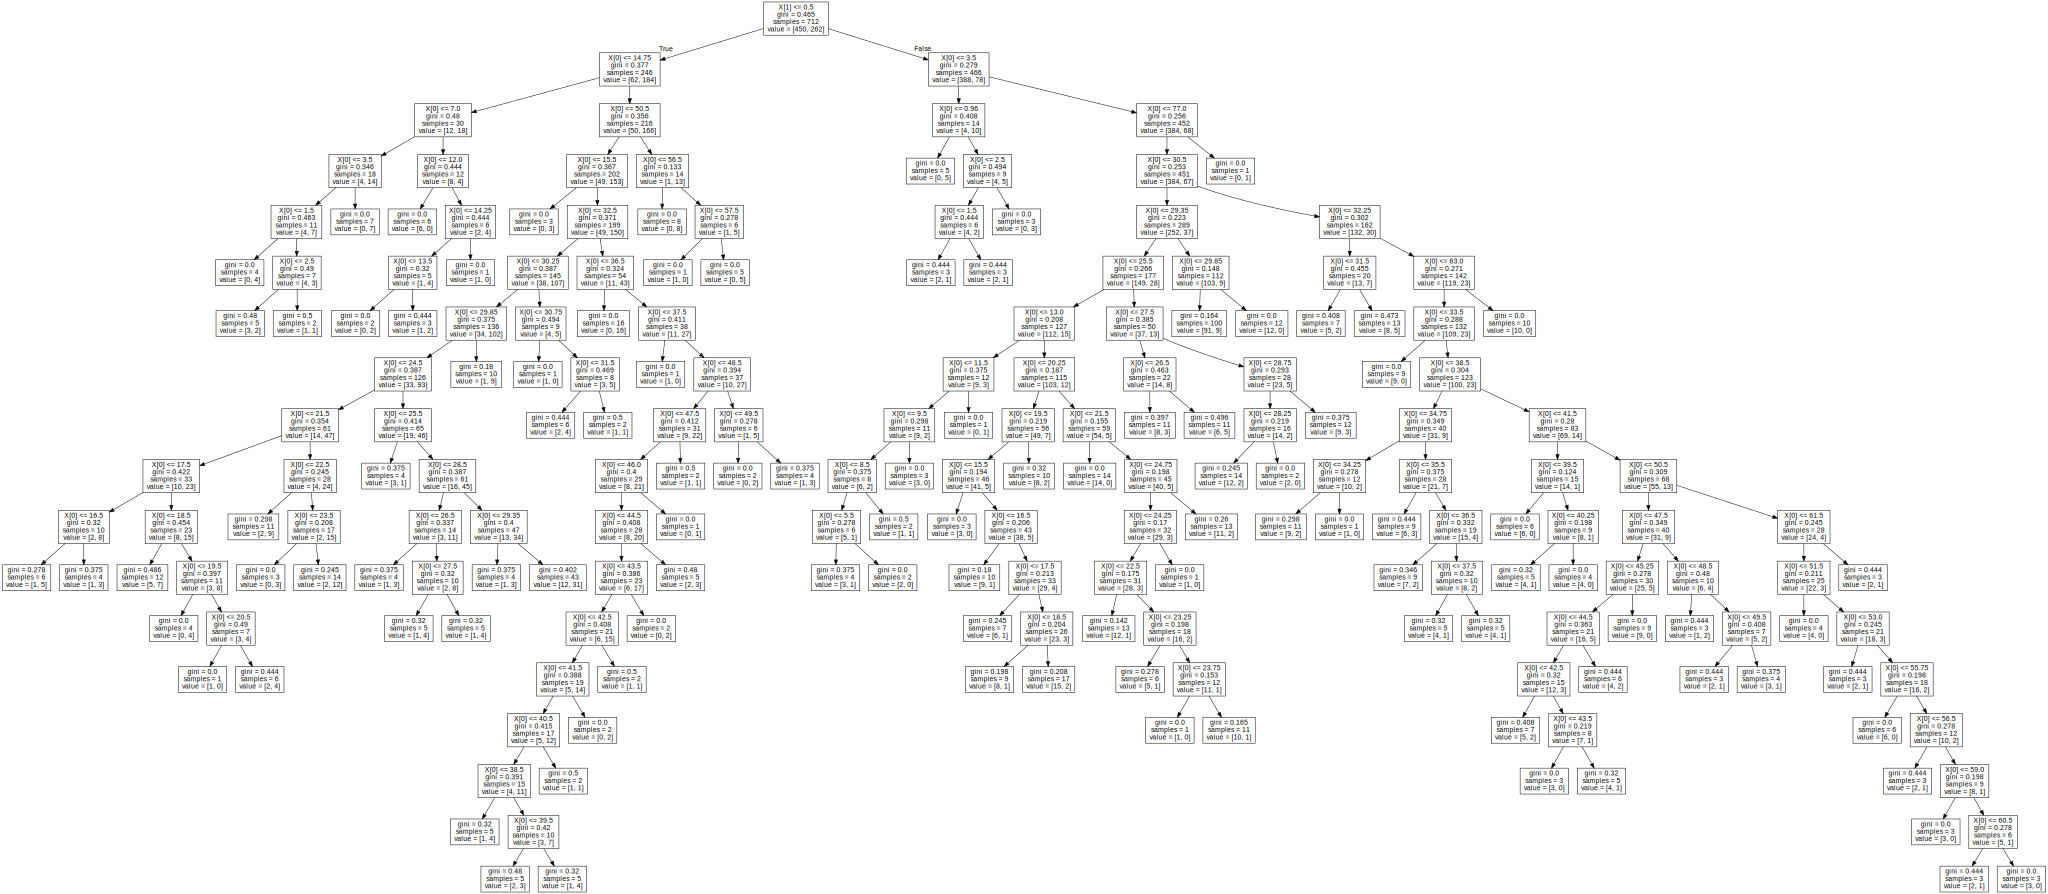

In [ ]:
dot_data = tree.export_graphviz(
    classifier,
    out_file=None
)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

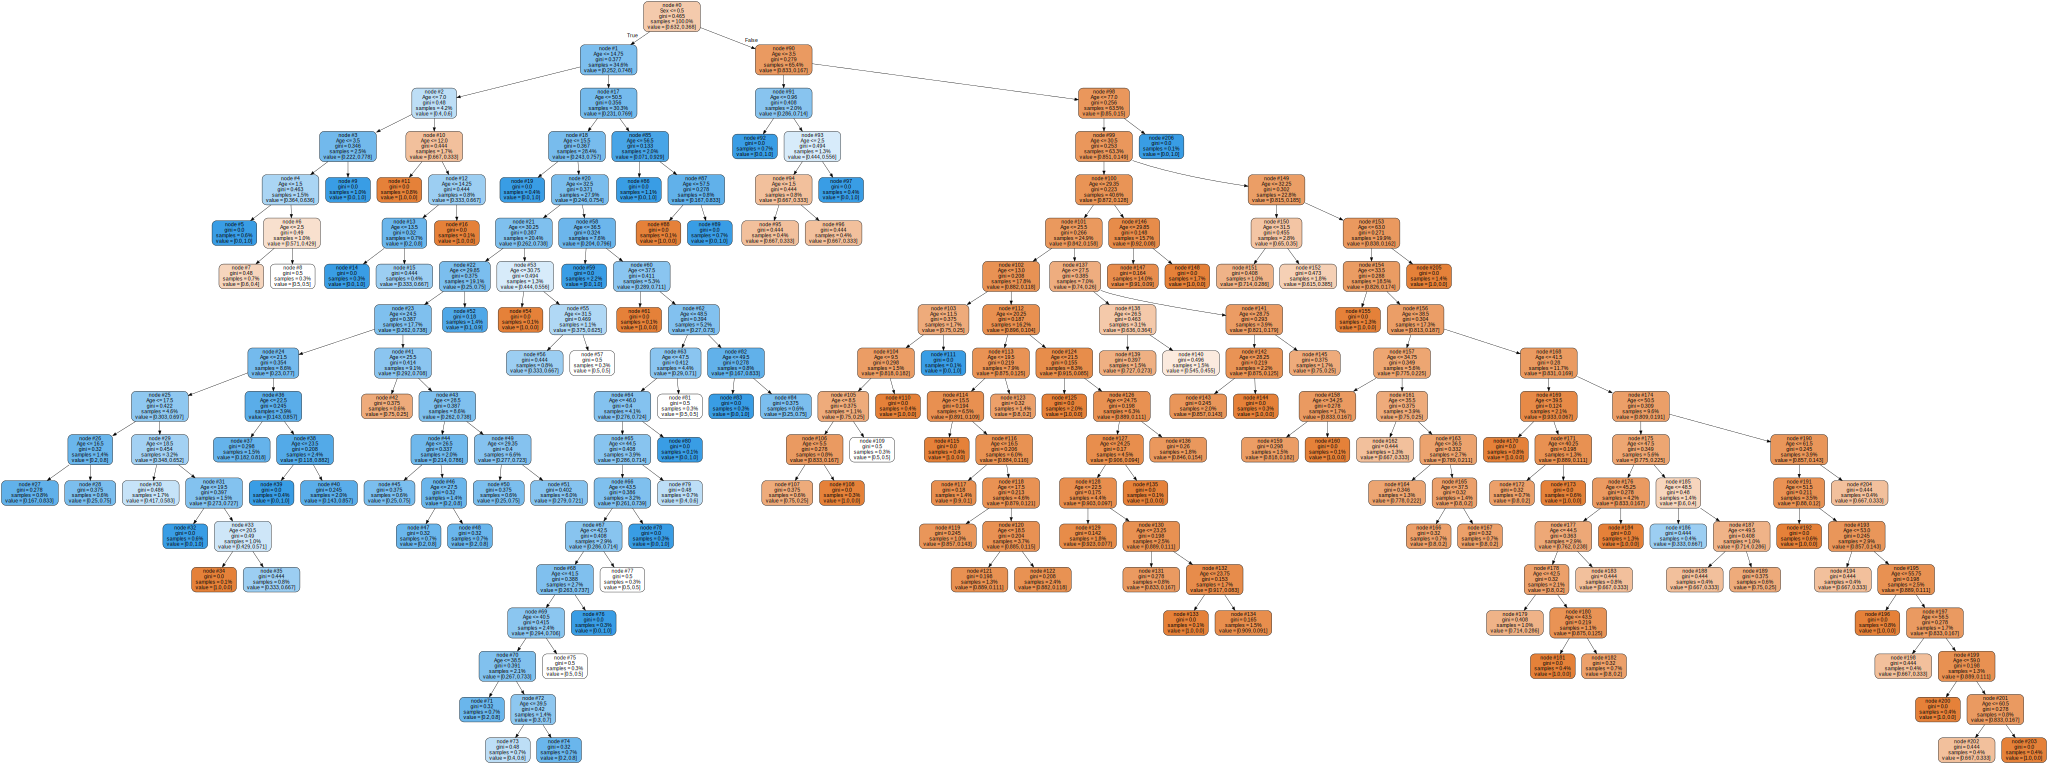

In [ ]:
dot_data = tree.export_graphviz(
    classifier, 
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    node_ids=True,
    rounded=True,
    proportion=True
)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10,min_samples_leaf = 5, max_depth = 5)

In [ ]:
dtree.fit(X_train,y_train)
predicted = dtree.predict(X_test)

print('Score: {}'.format(dtree.score(X_train,y_train)))

Score: 0.8033707865168539


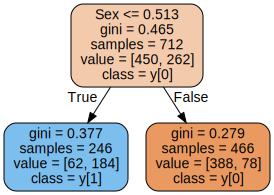

In [ ]:
dot_data = tree.export_graphviz(
    dtree, 
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    class_names = True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7318435754189944


In [ ]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7318435754189944


In [ ]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7206703910614525
